In [7]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string 
import operator

In [2]:
barley=pd.read_csv('barley_no_zero_duplicates.csv')
#bean=pd.read_csv('bean_no_zero_duplicates.csv')
corn_maize=pd.read_csv('corn_maize_no_zero_duplicates.csv')
#edamame=pd.read_csv('edamame_no_zero_duplicates.csv')
#lentil=pd.read_csv('lentil_no_zero_duplicates.csv')
millet=pd.read_csv('millet_no_zero_duplicates.csv')
#nut=pd.read_csv('nut_no_zero_duplicates.csv')
oat=pd.read_csv('oat_no_zero_duplicates.csv')
#pea=pd.read_csv('pea_no_zero_duplicates.csv')
potato=pd.read_csv('potato_no_zero_duplicates.csv')
quinoa=pd.read_csv('quinoa_no_zero_duplicates.csv')
rice=pd.read_csv('rice_no_zero_duplicates.csv')
rye=pd.read_csv('rye_no_zero_duplicates.csv')
sorghum=pd.read_csv('sorghum_no_zero_duplicates.csv')
soybean=pd.read_csv('soybean_no_zero_duplicates.csv')
wheat=pd.read_csv('wheat_no_zero_duplicates.csv')
legume=pd.read_csv('legume_no_zero_duplicates.csv')
whole=pd.read_csv('all_no_zero_duplicates.csv')

In [3]:
wheat.shape

(491, 25)

In [4]:
wheat.head()

,PROJECT_ID,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,...,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ABSTRACT
0,582541,Agriculture; Area; biosecurity; Blast Cell; C...,GENOME-ENABLED DIAGNOSIS OF THE WHEAT BLAST PA...,USDA,NIFA,NaN,2009-55605-05201,9/1/2009,12/31/2012,"VALENT, BARBARA",...,KS,66506-1100,UNITED STATES,NaN,NaN,10.212,2008,999688.0,NaN,"Wheat blast, currently a serious disease on wh..."
1,582558,Agriculture; Alleles; Breeding; Chemicals; Ch...,MOLECULAR GENETIC INTERACTIONS OF WHEAT RESIST...,USDA,NIFA,NaN,2009-35302-05262,9/1/2008,8/31/2012,"STUART, JEFFREY J",...,IN,47907-2024,UNITED STATES,NaN,NaN,10.206,2008,331511.0,NaN,Many agricultural insect pests are controlled ...
2,582582,Address; Africa; Arts; base; biosecurity; Col...,THE INCURSION OF NEW WHEAT STEM RUST RACES INT...,USDA,NIFA,NaN,2009-55605-05049,9/1/2009,1/31/2012,"ISARD, SCOTT",...,PA,16802-1505,UNITED STATES,NaN,NaN,10.212,2008,993692.0,NaN,New races of the wheat stem rust pathogen (Ug9...
3,582600,Agriculture; Anabolism; Cotyledon plant; Goal...,DELIMITING LEAF STARCH BIOSYNTHESIS IN WHEAT T...,USDA,NIFA,NaN,2009-35318-05050,7/1/2008,6/30/2011,"GIROUX, MICHAEL",...,MT,59717-0001,UNITED STATES,NaN,NaN,10.206,2008,177282.0,NaN,The goal of our research is to comprehensively...
4,582606,Address; Aphids; Businesses; Chemicals; Color...,IMPROVING CANOLA ADAPTATION USING DEFICIT IRRI...,USDA,NIFA,NaN,2008-38624-19592,10/1/2012,9/30/2014,"TROSTLE, CALVIN",...,TX,77843-0001,UNITED STATES,NaN,NaN,10.207,2008,81057.0,NaN,Canola has emerged as a crop that merits a clo...


In [5]:
def analysis(dataframe,filename,crop):
    print('total number of projects for '+crop,dataframe.shape[0])
    print('total number of projects with no funding for '+crop,dataframe['FY_TOTAL_COST'].isna().sum())
    
    
    # word count store in csv

    d = dict() 

    # Loop through each line of the file 
    for line in dataframe['PROJECT_TERMS']: 
        # Remove the leading spaces and newline character 
        line = str(line).strip() 

        # Convert the characters in line to  
        # lowercase to avoid case mismatch 
        line = line.lower() 

        # Remove the punctuation marks from the line 
        line = line.translate(line.maketrans("", "", string.punctuation)) 

        # Split the line into words 
        words = line.split(" ") 

        # Iterate over each word in line 
        for word in words: 
            # Check if the word is already in dictionary 
            if word in d: 
                # Increment count of word by 1 
                d[word] = d[word] + 1
            else: 
                # Add the word to dictionary with count 1 
                d[word] = 1
    #Print the contents of dictionary 
    sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
    df = pd.DataFrame.from_dict(sorted_d, orient="index")
    temp=filename+'.csv'
    df.to_csv(temp)
    
    # word cloud
    text = " ".join(str(review) for review in dataframe['PROJECT_TERMS'])
    print ("There are {} words in the combination of ".format(len(text))+crop+" review.")
    
    #stopwords = set(STOPWORDS)
    stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                      "public health","Research",'United States','study','Research Research','Research Personnel'])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    fig = plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.show()
    temp=filename+'_count.png'
    plt.savefig(temp)
    plt.close(fig)
    
    # agency wise funcding for each crop
    fig = plt.figure(figsize = (10,10))
    dataframe.groupby(['AGENCY'])['FY_TOTAL_COST'].sum().plot(kind='bar',title='Agency based funding for '+crop,figsize = (10,10))
    #plt.legend()
    #plt.xlabel('Time.year')
    #plt.ylabel('Total number of flights in the range of 1000000')
    temp=filename+'_agency_funding.png'
    plt.savefig(temp)
    plt.close(fig)
    
    # yearly funcding for each crop
    fig = plt.figure(figsize = (10,10))
    dataframe.groupby(['FY'])['FY_TOTAL_COST'].sum().plot(kind='bar',title='Yearly based funding for '+crop,figsize = (10,10))
    temp=filename+'_yearly_funding.png'
    plt.savefig(temp)
    plt.close(fig)
    
    # zero and non-zero projects for each agency and each crop
    print('total projects',dataframe.shape[0])
    print('count of non-zero funded projects',sum(dataframe.groupby(['AGENCY'])['FY_TOTAL_COST'].count().to_list()))
    print('count of zero fundings project',sum(dataframe['FY_TOTAL_COST'].isnull().groupby([dataframe['AGENCY']]).sum().astype(int).to_list()))

    count=dataframe.groupby(['AGENCY'])['FY_TOTAL_COST'].count()

    df = pd.DataFrame({"Count":count})
    fig = plt.figure(figsize = (10,10))
    ax = df.plot.bar(color=["SkyBlue"], title="Agency vs project counts for "+crop)
    ax.set_xlabel("Agency")
    ax.set_ylabel("counts")
    #ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
    #plt.show()
    temp=filename+'_agency_project_count.png'
    plt.savefig(temp)
    plt.close(fig)
    
    
    # zero and non-zero duplicates count
    wh=dataframe[dataframe['PROJECT_NUMBER'].duplicated() == True]
    print('Zero funding project in duplicates',wh['FY_TOTAL_COST'].isna().sum())
    print('Non zero funding project in duplicates',len(wh['FY_TOTAL_COST'])-wh['FY_TOTAL_COST'].isna().sum())
    
    print('----')
    print('----')


total number of projects for barley 186
total number of projects with no funding for barley 0
There are 87412 words in the combination of barley review.
total projects 186
count of non-zero funded projects 186
count of zero fundings project 0
Zero funding project in duplicates 0
Non zero funding project in duplicates 37
----
----
total number of projects for corn_maize 834
total number of projects with no funding for corn_maize 0
There are 387095 words in the combination of corn_maize review.
total projects 834
count of non-zero funded projects 834
count of zero fundings project 0
Zero funding project in duplicates 0
Non zero funding project in duplicates 94
----
----
total number of projects for millet 16
total number of projects with no funding for millet 0
There are 8173 words in the combination of millet review.
total projects 16
count of non-zero funded projects 16
count of zero fundings project 0
Zero funding project in duplicates 0
Non zero funding project in duplicates 1
----
-

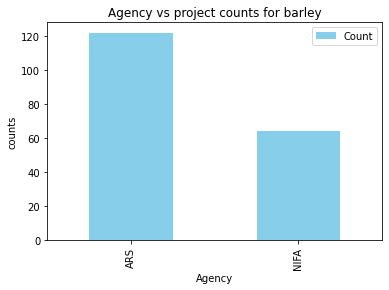

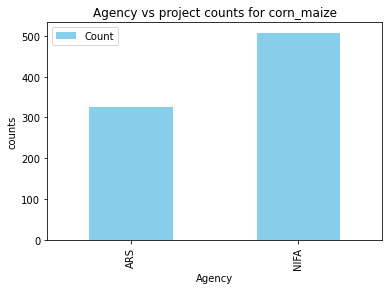

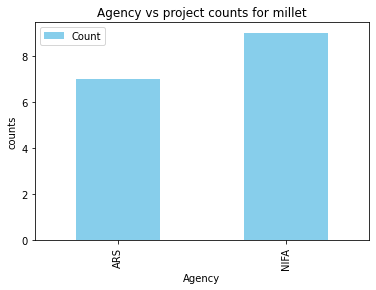

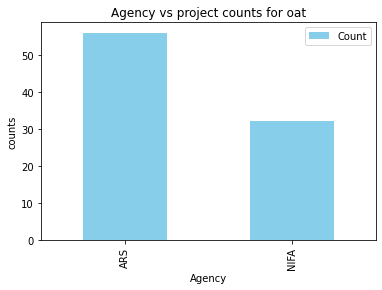

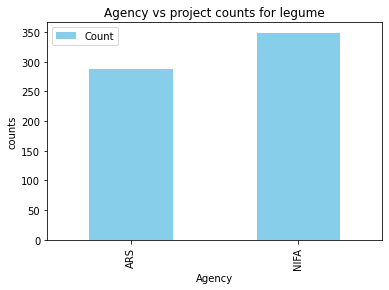

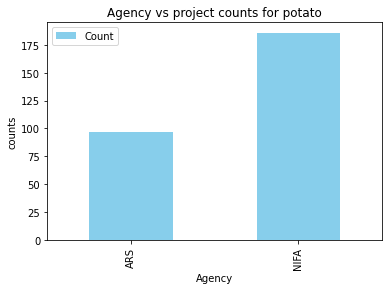

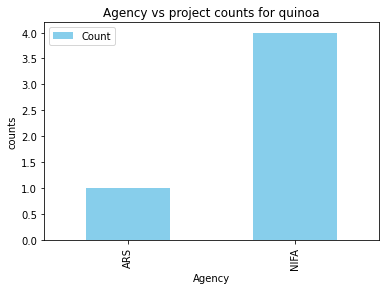

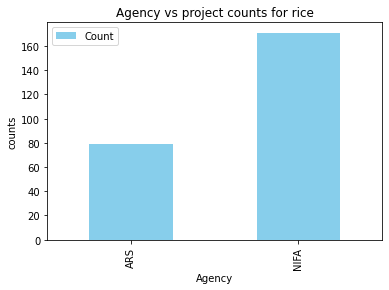

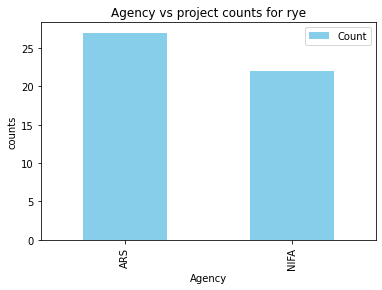

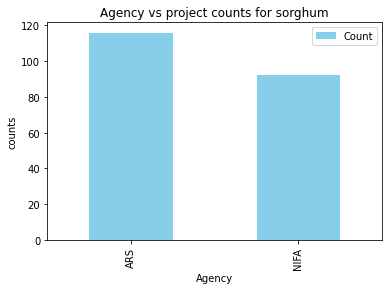

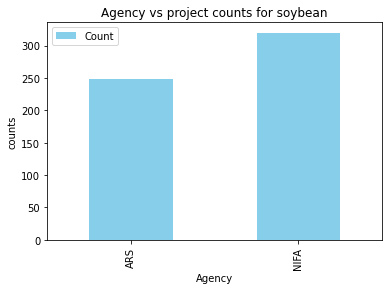

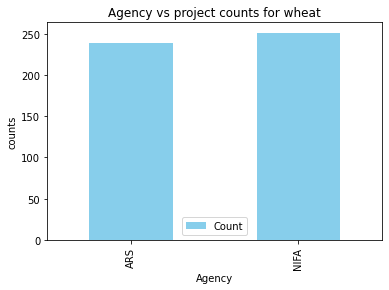

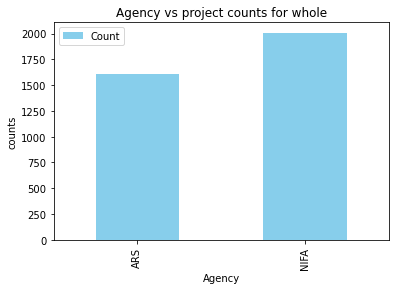

In [6]:
analysis(barley,'figures/barley','barley')
#analysis(bean,'figures/bean','bean')
analysis(corn_maize,'figures/corn_maize','corn_maize')
#analysis(edamame,'figures/edamame','edamame')
#analysis(lentil,'figures/lentil','lentil')
analysis(millet,'figures/millet','millet')
#analysis(nut,'figures/nut','nut')
analysis(oat,'figures/oat','oat')
analysis(legume,'figures/legume','legume')
analysis(potato,'figures/potato','potato')
analysis(quinoa,'figures/quinoa','quinoa')
analysis(rice,'figures/rice','rice')
analysis(rye,'figures/rye','rye')
analysis(sorghum,'figures/sorghum','sorghum')
analysis(soybean,'figures/soybean','soybean')
analysis(wheat,'figures/wheat','wheat')
analysis(whole,'figures/whole','whole')

# Combined analysis for all the crops

In [8]:
#print(list(dataframe.groupby(['FY'])['FY_TOTAL_COST'].sum()))

In [8]:
data=[barley,corn_maize,millet,oat,legume,potato,quinoa,rice,rye,sorghum,soybean,wheat]
category=['barley','corn_maize','millet','oat','legume','potato','quinoa','rice','rye',
         'sorghum','soybean','wheat']

In [9]:
yearly_cost_cols = ['2008','2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019', 'crop']
yearly_cost_ls=[]

for i in range(len(data)):
    #l=[]
    l=data[i].groupby(['FY'])['FY_TOTAL_COST'].sum().to_list()
    l.append(category[i])
    #l.append(df)
    yearly_cost_ls.append(l)
    
    
    #print(df)
yearly_cost = pd.DataFrame(yearly_cost_ls, columns = yearly_cost_cols) 
yearly_cost.to_csv('yearly_cost.csv', index=False)
#yearly_cost_ls

In [10]:
yearly_project_count = ['2008','2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019', 'crop']
yearly_project_count_ls=[]

for i in range(len(data)):
    #l=[]
    l=data[i].groupby(['FY'])['FY_TOTAL_COST'].count().to_list()
    l.append(category[i])
    #l.append(df)
    yearly_project_count_ls.append(l)
    
    
    #print(df)
yearly_project_count = pd.DataFrame(yearly_project_count_ls, columns = yearly_cost_cols) 
yearly_project_count.to_csv('yearly_project_count.csv', index=False)
#yearly_cost_ls

In [11]:
yearly_project_count

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,crop
0,10,19,15,7,11,20.0,3.0,13.0,12.0,29.0,24,23,barley
1,80,103,93,67,45,78.0,44.0,52.0,78.0,68.0,63,63,corn_maize
2,3,1,3,1,1,1.0,1.0,2.0,1.0,2.0,millet,None,None
3,1,9,4,8,3,12.0,7.0,6.0,13.0,13.0,12,oat,None
4,39,77,60,44,42,74.0,27.0,48.0,44.0,60.0,60,62,legume
5,32,32,28,16,15,36.0,18.0,22.0,23.0,21.0,21,19,potato
6,1,1,1,2,quinoa,NaN,NaN,NaN,NaN,NaN,None,None,None
7,34,25,23,23,12,33.0,11.0,21.0,23.0,16.0,15,14,rice
8,1,6,3,9,3,4.0,3.0,3.0,4.0,3.0,4,6,rye
9,11,13,24,8,11,23.0,11.0,18.0,10.0,27.0,26,26,sorghum


In [12]:
from matplotlib.pyplot import cm
def plot_figures(dataframe,crop):
    fig = plt.figure(figsize = (10,10))
    
    colors = iter(cm.rainbow(np.linspace(0, 1, len(dataframe))))
    i=0
    for i,color in enumerate(colors):
        dataframe=data[i]
        ax=dataframe.groupby(['FY'])['FY_TOTAL_COST'].sum().plot(style='o-', color= color, legend=True)
        ax.legend(crop)
    plt.xlabel('Financial Year',fontsize=14, fontweight='bold')
    plt.ylabel('Total Funding Amount for Each Year',fontsize=14, fontweight='bold')
    plt.savefig('all_crop_yearly_funding_distribution.png')
    plt.close(fig)
    
    

In [13]:
plot_figures(data,category)

In [14]:

from matplotlib.pyplot import cm
def plot_figures(dataframe,crop):
    fig = plt.figure(figsize = (10,10))
    colors = iter(cm.rainbow(np.linspace(0, 1, len(dataframe))))
    j=0
    for j,color in enumerate(colors):
        dataframe=data[j]
        ax=dataframe.groupby(['FY'])['FY_TOTAL_COST'].count().plot(style='o-',color= color, legend=True)
        ax.legend(crop)
    plt.xlabel('Financial Year',fontsize=14, fontweight='bold')
    plt.ylabel('Total Number of Projects Funded Each Year',fontsize=14, fontweight='bold')
    plt.savefig('all_crop_yearly_number_of_projects_funding_distribution.png')
    plt.close(fig)

In [15]:
plot_figures(data,category)

In [16]:
repartition = whole.groupby(by=whole["CATEGORY"]).sum()
repartition

,Unnamed: 0,PROJECT_ID,CONGRESSIONAL_DISTRICT,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,COUNT,FY_TOTAL_COST_UNIQUE,COUNT_UNIQUE,duplicate
CATEGORY,,,,,,,,,,,,,
barley,66172.0,168735163,701.0,0.0,0.0,1878.312,374661,213556142.0,0.0,516,9.235845e+07,186,0.0
corn_maize,1415438.0,665652708,5681.0,0.0,0.0,8482.194,1678919,782886533.0,0.0,1559,5.142050e+08,800,34.0
legume,1273676.0,526573241,3747.0,0.0,0.0,6472.136,1282635,567685914.0,0.0,1038,4.332685e+08,506,131.0
millet,686.0,13119108,150.0,0.0,0.0,162.949,32207,13282324.0,0.0,45,6.207512e+06,9,7.0
oat,23236.0,80777869,467.0,0.0,0.0,889.563,177293,100086268.0,0.0,287,3.740585e+07,25,63.0
potato,129724.0,222378003,2032.0,0.0,0.0,2879.577,569694,207360289.0,0.0,424,1.641536e+08,219,64.0
quinoa,24.0,3681812,44.0,0.0,0.0,51.128,10063,4869291.0,0.0,13,3.939036e+06,3,2.0
rice,395378.0,193130704,1573.0,0.0,0.0,2547.873,503198,167096810.0,0.0,502,1.105951e+08,162,88.0
rye,5198.0,40618524,339.0,0.0,0.0,496.832,98667,42140049.0,0.0,179,1.141053e+07,7,42.0


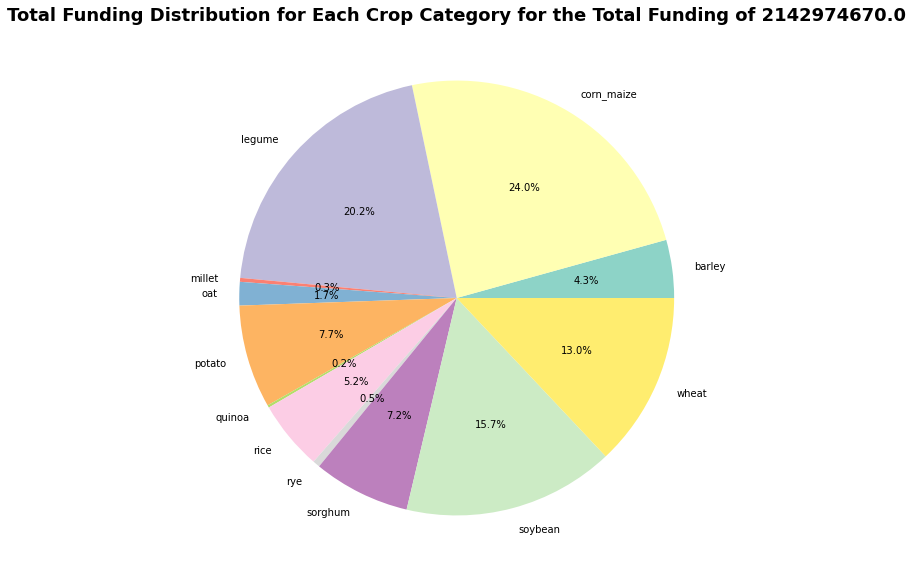

In [17]:
fig = plt.figure(figsize=(20, 10))
a = np.random.random(12)
cs = cm.Set3(np.arange(12)/12)
plt.pie(x=repartition["FY_TOTAL_COST_UNIQUE"],
        labels=repartition.index, colors=cs, autopct='%1.1f%%')
plt.title('Total Funding Distribution for Each Crop Category for the Total Funding of ' +
          str(repartition["FY_TOTAL_COST_UNIQUE"].sum()), fontsize=18, fontweight='bold')
plt.savefig('all_crop_funding_distribution.png')
plt.show()

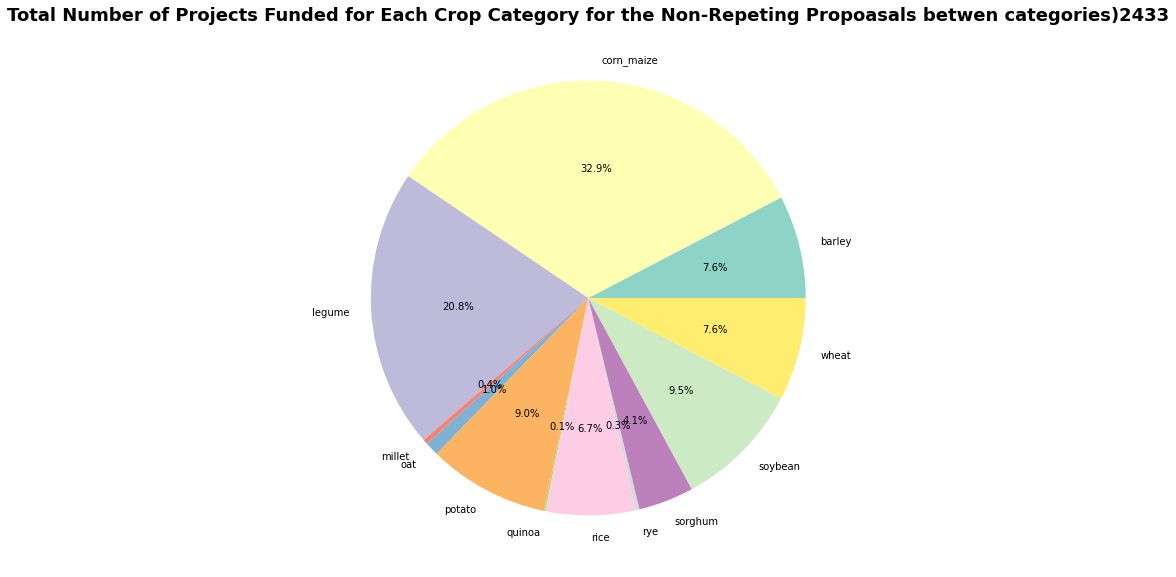

In [18]:
fig = plt.figure(figsize=(20, 10))
a = np.random.random(12)
cs = cm.Set3(np.arange(12)/12.)
plt.pie(x=repartition["COUNT_UNIQUE"],
        labels=repartition.index, colors=cs, autopct='%1.1f%%',)
plt.title('Total Number of Projects Funded for Each Crop Category for the Non-Repeting Propoasals betwen categories)' +
          str(repartition["COUNT_UNIQUE"].sum()), fontsize=18, fontweight='bold')
plt.savefig('all_crop_number_of_projects_funding_distribution.png')
plt.show()

In [21]:
repartition['COUNT_UNIQUE'].sum()

2433

In [28]:
t=whole.drop_duplicates(subset=['PROJECT_ID']).reset_index(drop=True)

In [30]:
t.to_csv('whole_removing duplicated project ids.csv')